## Loading files from google drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here we are reading the excel sheet from the google drive and creating a dataframe object using pandas libray.

In [2]:
import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/movie_review.csv')

In [3]:
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [4]:
# checking the len of the dataframe(number of rows in the dataframe)
len(df)

64720

## Extracting the reviews from the movie reviews dataset

In [5]:
# Selecting the column text from the dataframe 
# converting the column values to list using tolist function 
# slicing the top 10000 values from the list using list slicing functionality in python 
reviews = df["text"].tolist()[:5000]

In [6]:
reviews[:3]

["films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .",
 "for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen .",
 'to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .']

## Predicting Sentiments of Movie Revies using Transformer [library](https://huggingface.co/course/chapter1)

* Installing the transformers library using pip install 
* pip install <package> is a way to install any python package

In [7]:
! pip install datasets transformers[sentencepiece]

     |████████████████████████████████| 266kB 29.3MB/s 
     |████████████████████████████████| 2.5MB 28.8MB/s 
     |████████████████████████████████| 122kB 52.8MB/s 
     |████████████████████████████████| 245kB 51.4MB/s 
     |████████████████████████████████| 3.3MB 46.9MB/s 
     |████████████████████████████████| 901kB 46.5MB/s 
     |████████████████████████████████| 1.1MB 44.0MB/s 
ERROR: transformers 4.8.2 has requirement huggingface-hub==0.0.12, but you'll have huggingface-hub 0.0.13 which is incompatible.


In [8]:
# Importing the pipeline from the transformers libary
from transformers import pipeline

# creating a classifier function from the pipeline 
classifier = pipeline("sentiment-analysis")


In [9]:

# passing the movie revies to the classifer to predict the sentimets
output = classifier(reviews[:1000])

In [11]:
len(output)

1000

* Classifier is a function 
* Classfier takes string as input and predict the review <br>
Example1: <br>
 i/0: classifier("this movie is good")<br>
 o/p: [[{'label': 'POSITIVE', 'score': 0.9015467762947083}]<br>
Example2: <br>
i/o: classifier(["this movie is bad", "this movie is good"]) <br>
o/p: [{'label': 'POSITIVE', 'score': 0.9015467762947083}, <br>
 {'label': 'POSITIVE', 'score': 0.9899366497993469}] <br>
* Classifier takes list of strings as input and predicts the reviews <br>

## Analysing and Creating a barplot 


* Creating dataframe object(table in excel sheet) from the list of dictionaries using the syntax below 

In [13]:
output_data = pd.DataFrame(output)
output_data

,label,score
0,POSITIVE,0.901547
1,POSITIVE,0.989937
2,NEGATIVE,0.995448
3,NEGATIVE,0.984996
4,POSITIVE,0.978787
...,...,...
995,NEGATIVE,0.999294
996,POSITIVE,0.999136
997,POSITIVE,0.999654
998,POSITIVE,0.999628


### Creating Bar Chart using pandas inbuilt [Extra Circulum]

In [17]:
out_df = output_data['label'].value_counts().to_frame()
out_df['review_type'] = out_df.index 
out_df 

,label,review_type
POSITIVE,559,POSITIVE
NEGATIVE,441,NEGATIVE


In [31]:
out_df['label'] = (out_df["label"]/1000)*100
out_df 

,label,review_type
POSITIVE,55.9,POSITIVE
NEGATIVE,44.1,NEGATIVE


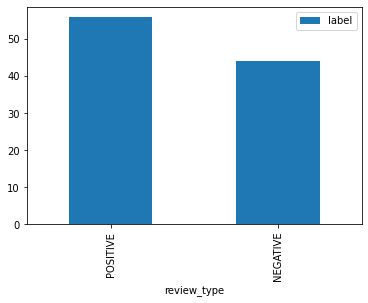

In [32]:
out_df.plot.bar(x='review_type', y='label')

In [35]:
out_df

,label,review_type
POSITIVE,55.9,POSITIVE
NEGATIVE,44.1,NEGATIVE


In [37]:
output_dict = out_df['label'].to_dict()
output_dict 

{'NEGATIVE': 44.1, 'POSITIVE': 55.900000000000006}

### Analysing the output using Matplotlib 

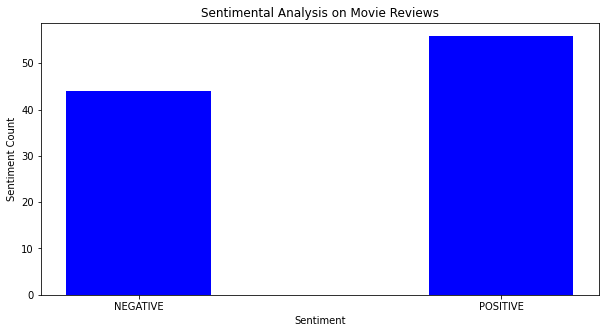

In [39]:
# Visualization using matplotlib
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (10, 5))

plt.bar(["NEGATIVE", "POSITIVE"], [44.1, 55.9], color ='blue',
        width = 0.4)
 
plt.xlabel("Sentiment")
plt.ylabel("Sentiment Count")
plt.title("Sentimental Analysis on Movie Reviews")
plt.show()

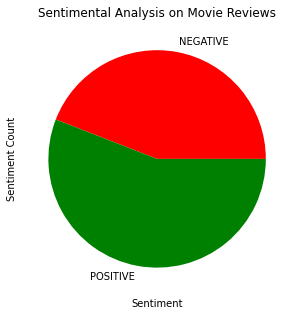

In [40]:
# Visualization using matplotlib
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (10, 5))

plt.pie(x = [44.1, 55.9], labels = ["NEGATIVE", "POSITIVE"], colors=["red", "green"])
 
plt.xlabel("Sentiment")
plt.ylabel("Sentiment Count")
plt.title("Sentimental Analysis on Movie Reviews")
plt.show()